# Introdução

Este estudo tem por fim analisar de forma empírica a complexidade do tempo de execução de uma série de algorimos de busca e ordenação.

Todos os algoritmos a seguir foram implementados em C e compilados com o GCC com a flag de debug `-ggdb3` ativada.

Os vetores são contruidos aleatóriamente com inteiros que variam [0, INT_MAX]. Os testes consistem de vetores de tamanhos que variam [1, 1e7 + 1], com passo de 

## Linear search

A busca linear é um algoritmo que percorre um vetor de forma sequencial, comparando cada elemento do vetor com o elemento que se deseja encontrar.

Sua complexidade é a seguinte para o caso onde o elemento procurado encontra-se no vetor:

| Case                        | Order |
|-----------------------------|-------|
| Worst-case performance      | O(n)  |
| Best-case performance       | O(1)  |
| Average performance         | O(n)  |
| Worst-case space complexity | O(1)  |

In [325]:
%%bash
cd benchmarks/linear_search

make
./main > out.csv

echo "-------------------"

head out.csv
echo "..."
tail out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media 
1 0 3e-06 4.5e-07
2001 0 8e-06 3.935e-06
4001 0 1.7e-05 6.74e-06
6001 0 2.1e-05 9.56e-06
8001 0 4.9e-05 1.438e-05
10001 0 3.3e-05 1.6765e-05


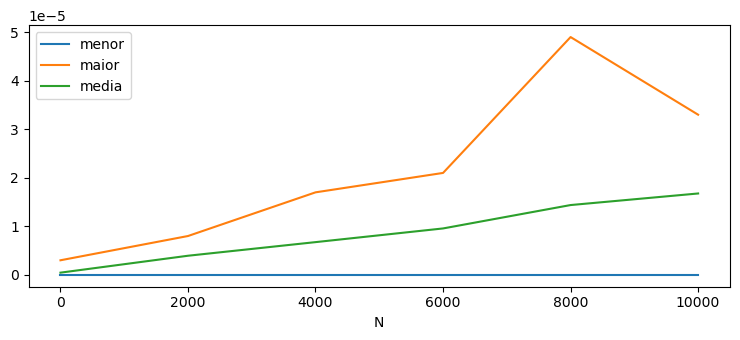

In [326]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ["N", "menor", "maior", "media"]

src = "benchmarks/linear_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

# a coluna 'maior' pode ser removida do dataframe para analizar
# unicamente o comportamento linear da média
df.loc[:, df.columns.difference([])].set_index("N").plot()

plt.show()


## Binary Search

A busca binária é um algoritmo que percorre um vetor ordenado através do método de dividir para conquistar, partindo ele em subvetores e comparando o elemento que se deseja encontrar com o elemento do meio do vetor, seguindo para a metade do vetor onde o elemento se encontra.

Sua complexidade é a seguinte para o caso onde o elemento procurado encontra-se no vetor:

| Case                        | Order     |
|-----------------------------|-----------|
| Worst-case performance      | O(log n)  |
| Best-case performance       | O(1)      |
| Average performance         | O(log n)  |
| Worst-case space complexity | O(1)      |

In [1]:
%%bash
cd benchmarks/binary_search

make
./main > out.csv

echo "-------------------"

head out.csv
echo "..."
tail out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media 
1 0 5.5e-05 3.21e-07
1001 0 1e-06 3.73e-07
2001 0 6.1e-05 4.53e-07
3001 0 6.3e-05 3.58e-07
4001 0 1e-06 1.15e-07
5001 0 5.3e-05 1.85e-07
6001 0 1e-06 1.37e-07
7001 0 2e-06 2.35e-07
8001 0 7.4e-05 2.63e-07
9001 0 5.6e-05 3.07e-07
10001 0 2e-06 3.16e-07
11001 0 2e-06 2.61e-07
12001 0 6.5e-05 3.93e-07
13001 0 3e-06 2.74e-07
14001 0 5.4e-05 3.19e-07
15001 0 5.7e-05 3.67e-07
16001 0 5.4e-05 3.78e-07
17001 0 5.5e-05 3.43e-07
18001 0 6.6e-05 4.02e-07
19001 0 0.000107 4.51e-07
20001 0 2e-06 2.83e-07
21001 0 5.5e-05 4.52e-07
22001 0 5.3e-05 3.42e-07
23001 0 6.1e-05 4.14e-07
24001 0 9.4e-05 6.12e-07
25001 0 5.3e-05 4.14e-07
26001 0 5.7e-05 4.

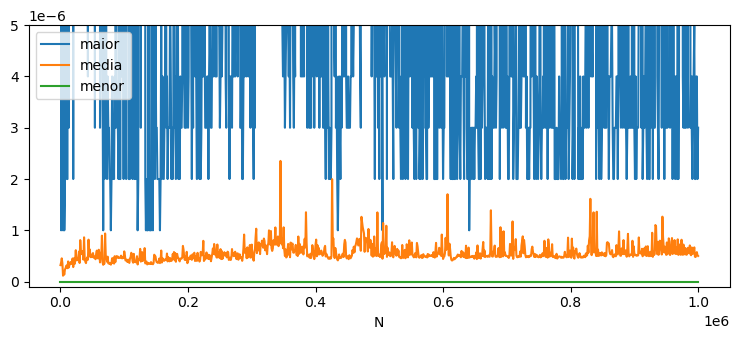

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ["N", "menor", "maior", "media"]

src = "benchmarks/binary_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

# a coluna 'maior' pode ser removida do dataframe para analizar
# unicamente o comportamento linear da média
df.loc[:, df.columns.difference([''])].set_index("N").plot()

ax = plt.gca()
ax.set_ylim([-0.1e-6, 0.5e-05])

plt.show()